# Wikimedia dataset

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
%config InlineBackend.figure_format = 'retina'

Matplotlib created a temporary config/cache directory at /home/aaossa/.cache/matplotlib because the default path (/tmp/matplotlib-y4h5unb5) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


In [2]:
data = pd.read_csv("data.csv")
data.head()

,score,image_id,user,timestamp
0,1,200411001,1,1100202420
1,1,200411001,2,1100216280
2,1,200411001,3,1100220060
3,-1,200411001,4,1100275680
4,-1,200411001,5,1100685060


## Interactions data

In [3]:
print("Interactions shape", data.shape)

Interactions shape (199095, 4)


There are 1999095 rows in the data file, but only possitive feedback will be considered. But first, some user-item interactions are repeated, and we'll consider only the last one

In [4]:
# Sort by timestamp
data = data.sort_values(by="timestamp", ascending=True)

In [5]:
# Keep latest interaction between user-item pairs
data = data.groupby(["user", "image_id"]).tail(1).reset_index(drop=True)

In [6]:
# Keep positive feedback interactions only
data = data[data["score"] > 0]

In [7]:
print("Interactions shape", data.shape)

Interactions shape (124844, 4)


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 124844 entries, 2 to 186626
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype
---  ------     --------------   -----
 0   score      124844 non-null  int64
 1   image_id   124844 non-null  int64
 2   user       124844 non-null  int64
 3   timestamp  124844 non-null  int64
dtypes: int64(4)
memory usage: 4.8 MB


No missing values in this dataframe. `timestamp` is already a timestamp, so everything is OK here.

In [9]:
data.head()

,score,image_id,user,timestamp
2,1,200411001,1,1100202420
3,1,200411002,1,1100202420
4,1,200411002,2,1100216220
5,1,200411001,2,1100216280
6,1,200411001,3,1100220060


In [10]:
data.describe()

,score,image_id,user,timestamp
count,124844.0,1.248440e+05,124844.000000,1.248440e+05
mean,1.0,2.013335e+08,3395.812526,1.380725e+09
std,0.0,3.928474e+05,2090.746060,1.239704e+08
min,1.0,2.004110e+08,1.000000,1.100202e+09
25%,1.0,2.010062e+08,1472.000000,1.277203e+09
50%,1.0,2.014081e+08,3521.000000,1.407682e+09
75%,1.0,2.017010e+08,5021.000000,1.483093e+09
max,1.0,2.019071e+08,7502.000000,1.561939e+09


Sort and reset index. Also drop score column.

In [11]:
data = data.sort_values(by="timestamp", ascending=True)
data = data.drop(["score"], axis=1)
data = data.reset_index(drop=True)
data.head()

,image_id,user,timestamp
0,200411001,1,1100202420
1,200411002,1,1100202420
2,200411002,2,1100216220
3,200411001,2,1100216280
4,200411001,3,1100220060


**How many users and items left?** Some may have been dropped, so let's count again:

In [12]:
print("Users:", data["user"].nunique())
print("Items:", data["image_id"].nunique())

Users: 3852
Items: 22336


**Maximum number of interactions at the same time?** Sometimes this happen

In [13]:
# No idea how (or why)
data.groupby(["timestamp"]).count().max()

image_id    30
user        30
dtype: int64

**Number of interactions per item?**

In [14]:
items = data.groupby(["image_id"]).count()["user"]
items.describe()

count    22336.000000
mean         5.589362
std          5.134003
min          1.000000
25%          1.000000
50%          4.000000
75%          9.000000
max         35.000000
Name: user, dtype: float64

**Most active items?**

In [15]:
most_active_items = items.sort_values(ascending=False)
most_active_items.head()

image_id
201707149    35
201904168    34
200809038    33
201901175    31
200610091    31
Name: user, dtype: int64

In [16]:
N = 2234  # 10%
interactions_by_active_items = most_active_items[:N].sum() / items.sum() * 100
print(f"{interactions_by_active_items:.2f} % of interactions comes from the top {N} most active items")

30.22 % of interactions comes from the top 2234 most active items


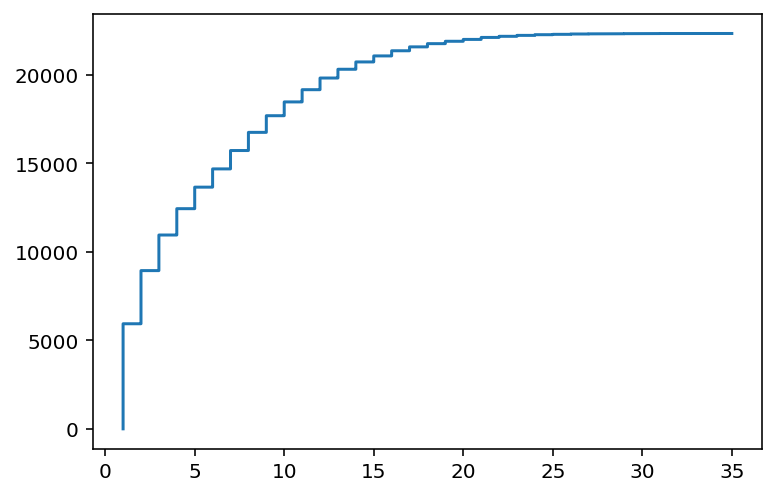

In [17]:
sorted_data = np.sort(most_active_items)
plt.step(sorted_data, np.arange(sorted_data.size))
plt.show()

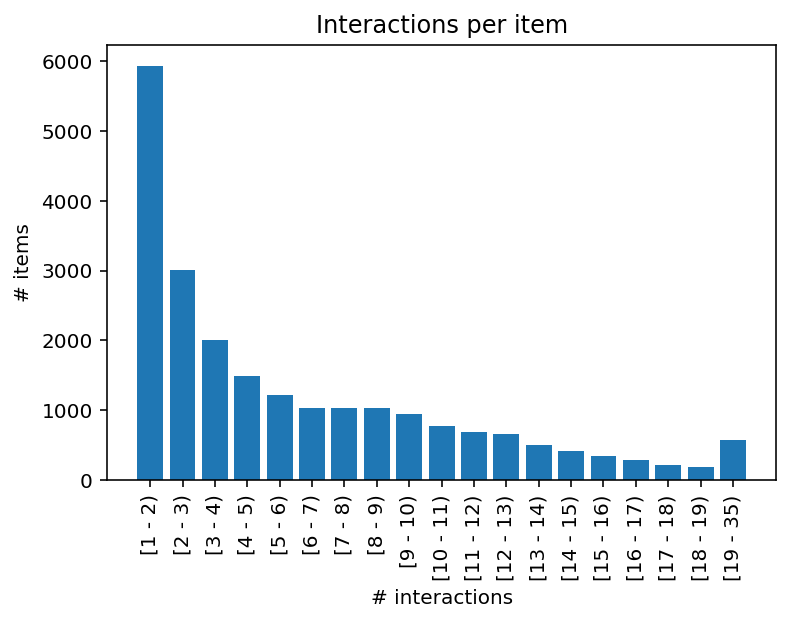

In [18]:
bins = list(range(1, 20)) + [items.max()]

hist, bins = np.histogram(items, bins)
x_axis = np.arange(0, len(hist))
plt.bar(x_axis, hist)
bin_names = [f"[{bins[i]} - {bins[i+1]})" for i in range(len(hist))]
plt.xticks(x_axis, bin_names, rotation=90)

# Title and labels
plt.title("Interactions per item")
plt.xlabel("# interactions")
plt.ylabel("# items")
plt.show()

**Number of interactions per user?**

In [19]:
users = data.groupby(["user"]).count()["image_id"]
users.describe()

count    3852.000000
mean       32.410177
std       165.767569
min         1.000000
25%         1.000000
50%         2.000000
75%         9.000000
max      4081.000000
Name: image_id, dtype: float64

**Most active users?**

In [20]:
most_active_users = users.sort_values(ascending=False)
most_active_users.head()

user
2524    4081
4605    3270
2133    3017
5907    2771
5607    2348
Name: image_id, dtype: int64

In [21]:
N = 20
interactions_by_active_users = most_active_users[:N].sum() / users.sum() * 100
print(f"{interactions_by_active_users:.2f} % of interactions comes from the top {N} most active users")

29.70 % of interactions comes from the top 20 most active users


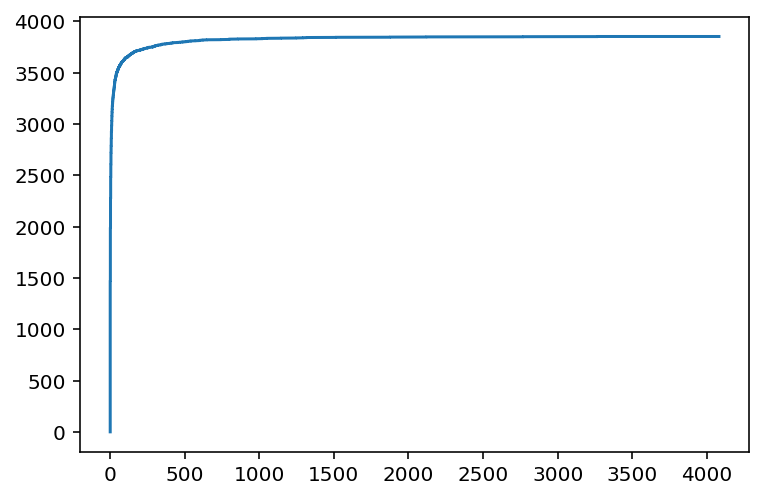

In [22]:
sorted_data = np.sort(most_active_users)
plt.step(sorted_data, np.arange(sorted_data.size))
plt.show()

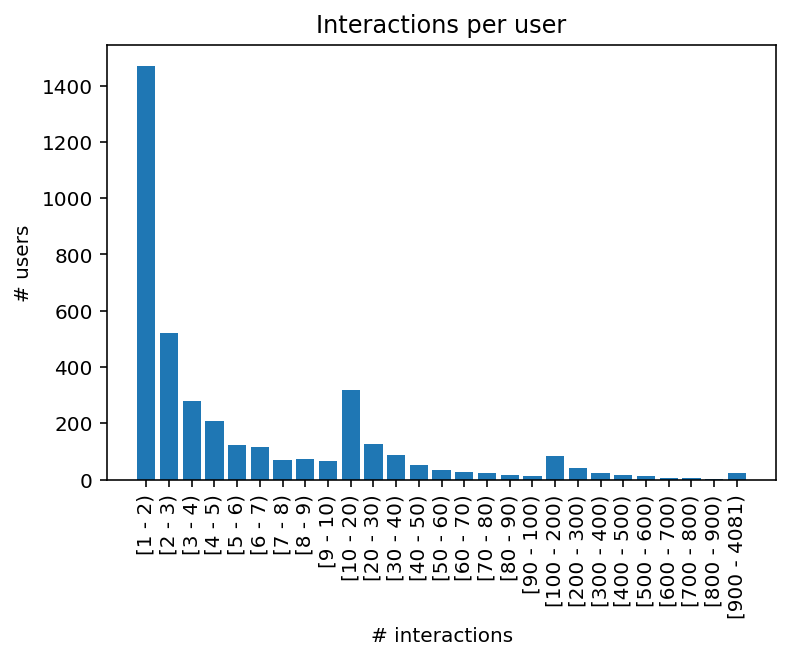

In [23]:
bins = (
    list(range(1, 10))
    + [10*i for i in range(1, 10)]
    + [100*i for i in range(1, 10)]
    + [users.max()]
)

hist, bins = np.histogram(users, bins)
x_axis = np.arange(0, len(hist))
plt.bar(x_axis, hist)
bin_names = [f"[{bins[i]} - {bins[i+1]})" for i in range(len(hist))]
plt.xticks(x_axis, bin_names, rotation=90)

# Title and labels
plt.title("Interactions per user")
plt.xlabel("# interactions")
plt.ylabel("# users")
plt.show()

## Output

In [24]:
n_users = data["user"].nunique()
n_items = data["image_id"].nunique()
n_items_gt = 32958
print(f"Unique users: {n_users}")
print(f"Unique items: {n_items_gt}")
print(f"Unique items 'interacted': {n_items}")
print(f"Interactions per user: {users.mean()} +/- {users.std()}")
actual_mean = items.sum() / n_items_gt
actual_std = np.sqrt(np.mean(np.abs(items - actual_mean)**2))
print(f"Interactions per item: {actual_mean} +/- {actual_std}") 
print(f"Interactions per 'interacted' item: {items.mean()} +/- {items.std()}")
possible_interactions = n_users * n_items_gt
print(f"Possible interactions: {possible_interactions}")
print(f"Sparsity: {100 * len(data) / possible_interactions:2f}%")

Unique users: 3852
Unique items: 32958
Unique items 'interacted': 22336
Interactions per user: 32.41017653167186 +/- 165.7675692704495
Interactions per item: 3.7879725711511623 +/- 5.440754741791254
Interactions per 'interacted' item: 5.589362464183381 +/- 5.134002988026076
Possible interactions: 126954216
Sparsity: 0.098338%


In [25]:
data

,image_id,user,timestamp
0,200411001,1,1100202420
1,200411002,1,1100202420
2,200411002,2,1100216220
3,200411001,2,1100216280
4,200411001,3,1100220060
...,...,...,...
124839,201907069,2738,1561931460
124840,201907045,7374,1561938720
124841,201907042,7374,1561938780
124842,201907043,7374,1561938900


In [26]:
data = data.rename(columns={
    "user": "user_id",
    "image_id": "item_id",
})
data["artist_id"] = -1
data = data[["user_id", "item_id", "artist_id", "timestamp"]]
data = data.sort_values("timestamp")
data = data.reset_index(drop=True)

In [27]:
data.to_csv("wikimedia.csv", index=False)

In [28]:
data

,user_id,item_id,artist_id,timestamp
0,1,200411001,-1,1100202420
1,1,200411002,-1,1100202420
2,2,200411002,-1,1100216220
3,2,200411001,-1,1100216280
4,3,200411001,-1,1100220060
...,...,...,...,...
124839,2738,201907069,-1,1561931460
124840,7374,201907045,-1,1561938720
124841,7374,201907042,-1,1561938780
124842,7374,201907043,-1,1561938900
